In [1]:
!unzip files.zip
!rm -rf files.zip

Archive:  files.zip
  inflating: computations_cpu.py     
  inflating: computations_pycuda.py  
  inflating: computations_torch.py   
  inflating: control_main.py         
  inflating: pixel_method_2d_base.py  


In [2]:
!pip install seaborn numpy torch matplotlib pycuda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 10.5 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2025.1.2-cp312-cp312-linux_x86_64.whl size=659050 sha256=aa981589b3492a564bd73239a37db44b23814200ce6c614699add9798867ed05
  Stored in directory: /root/.cache/pip/wheels/d5/36/f3/ac5f09d768cad3fa15d5a3449bdfe65c3de58e69d036c73228
Successfully built pycuda


In [3]:
%matplotlib inline

In [4]:
import torch
print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
!nvidia-smi

CUDA Available: True
GPU Name: Tesla T4
Sun Nov  9 14:19:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             12W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-------


[SETUP] N=200,000, steps=200, dt=0.01, V=1.0
[PATH] CPU: /content/computations_cpu.py
[INIT] CPU: CPU
[OK] CPU    | Euler rollout: 0.4230s
[OK] CPU    | RK2   rollout: 1.1324s
[OK] CPU    | RK4   rollout: 1.9816s
[PATH] TORCH: /content/computations_torch.py
[INIT] TORCH: torch on CUDA:0 (Tesla T4)
[OK] TORCH  | Euler rollout: 0.0293s
[OK] TORCH  | RK2   rollout: 0.0504s
[OK] TORCH  | RK4   rollout: 0.1059s
[PATH] PYCUDA: /content/computations_pycuda.py
[INIT] PYCUDA: PYCUDA
[OK] PYCUDA | Euler rollout: 0.0003s
[OK] PYCUDA | RK2   rollout: 0.3270s
[OK] PYCUDA | RK4   rollout: 0.8747s

=== Timing summary (seconds) by method ===
Method           CPU       TORCH      PYCUDA
--------------------------------------------
RK4           1.9816      0.1059      0.8747
RK2           1.1324      0.0504      0.3270
Euler         0.4230      0.0293      0.0003


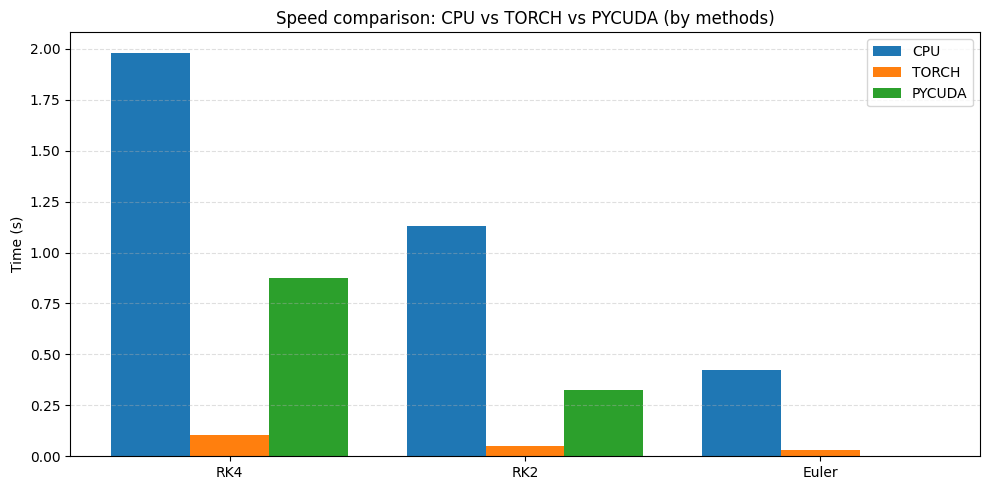

<Figure size 640x480 with 0 Axes>

In [5]:
%run /content/control_main.py